In [11]:
import pickle
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn import model_selection
from sklearn.metrics import plot_roc_curve


In [3]:
with open('lightgbm.pkl', 'rb') as f1:
    lgb_best = pickle.load(f1)
with open('rf.pkl', 'rb') as f1:
    rf_best = pickle.load(f1)
with open('ridge.pkl', 'rb') as f1:
    ridge_best = pickle.load(f1)

In [2]:
%%bash
git clone https://github.com/ZhuoqunWang0120/cs671kaggle.git

Cloning into 'cs671kaggle'...


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function `plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: RocCurveDisplay.from_predictions or RocCurveDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function `plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: RocCurveDisplay.from_predictions or RocCurveDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function `plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: RocCurveDisplay.from_predictions or RocCurveDisplay.from_estimator.
  warnings.wa

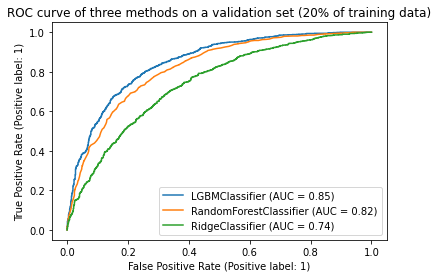

In [12]:
train_data = pd.read_csv('./cs671kaggle/data/train.csv')
train_data = train_data.dropna()
# drop id
train_data = train_data.drop(columns = 'id')
# transform age to age groups
train_data.Age = list(map(lambda s: s[0], train_data.Age.astype('str')))
# transform dtype of temperature
train_data.Temperature = train_data.Temperature.astype('float')
# one-hot encoding
train_data = pd.get_dummies(train_data,dummy_na=False)
Xtrain, ytrain = train_data.drop(columns = 'Decision'), train_data.Decision
Xtrain1, Xval, ytrain1, yval = model_selection.train_test_split(Xtrain, ytrain, random_state = 0, test_size = 0.2)
fig = plot_roc_curve(lgb_best.fit(Xtrain1, ytrain1), Xval, yval)
fig = plot_roc_curve(rf_best.fit(Xtrain1, ytrain1), Xval, yval, ax = fig.ax_)
fig = plot_roc_curve(ridge_best.fit(Xtrain1, ytrain1), Xval, yval, ax = fig.ax_)

plt.title('ROC curve of three methods on a validation set (20% of training data)')
pass
